In [26]:
library(dplyr)
library(ggplot2)


# dplyr
- select()
- filter()
- mutate()
- arrange()
- group_by()
- summarise()
- glimpse()

- playerID: Player ID code. Factor
- yearID: Year. Factor
- teamID: Team. factor
- lgID: League. Factor: AA AL FL NL PL UA
- AB: At bats. Numeric
- G: Games: number of games by a player. Numeric
- R: Runs. Numeric
- HR: Homeruns. Numeric
- SH: Sacrifice hits. Numeric


In [4]:
data <- read.csv("https://raw.githubusercontent.com/guru99-edu/R-Programming/master/lahman-batting.csv")

In [13]:
glimpse(data)

Rows: 104,324
Columns: 22
$ playerID <fct> abercda01, addybo01, allisar01, allisdo01, ansonca01, armstb…
$ yearID   <int> 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, …
$ stint    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ teamID   <fct> TRO, RC1, CL1, WS3, RC1, FW1, RC1, BS1, FW1, BS1, CL1, CL1, …
$ lgID     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ G        <int> 1, 25, 29, 27, 25, 12, 1, 31, 1, 18, 22, 1, 10, 3, 20, 29, 1…
$ AB       <int> 4, 118, 137, 133, 120, 49, 4, 157, 5, 86, 89, 3, 36, 15, 94,…
$ R        <int> 0, 30, 28, 28, 29, 9, 0, 66, 1, 13, 18, 0, 6, 7, 24, 26, 0, …
$ H        <int> 0, 32, 40, 44, 39, 11, 1, 63, 1, 13, 27, 0, 7, 6, 33, 32, 0,…
$ X2B      <int> 0, 6, 4, 10, 11, 2, 0, 10, 1, 2, 1, 0, 0, 0, 9, 3, 0, 0, 1, …
$ X3B      <int> 0, 0, 5, 2, 3, 1, 0, 9, 0, 1, 10, 0, 0, 0, 1, 3, 0, 0, 1, 0,…
$ HR       <int> 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ RBI      <int> 0, 13, 19

In [17]:
data %>% 
    select(c(playerID, yearID, AB, teamID, lgID, G, R, HR, SH)) %>% 
    arrange(playerID, teamID, yearID) %>%
    glimpse()

Rows: 104,324
Columns: 9
$ playerID <fct> aardsda01, aardsda01, aardsda01, aardsda01, aardsda01, aards…
$ yearID   <int> 2015, 2008, 2007, 2006, 2012, 2013, 2009, 2010, 2004, 1966, …
$ AB       <int> 1, 1, 0, 2, 0, 0, 0, 0, 0, 603, 600, 606, 547, 516, 495, 449…
$ teamID   <fct> ATL, BOS, CHA, CHN, NYA, NYN, SEA, SEA, SFN, ATL, ATL, ATL, …
$ lgID     <fct> NL, AL, AL, NL, AL, NL, AL, AL, NL, NL, NL, NL, NL, NL, NL, …
$ G        <int> 33, 47, 25, 45, 1, 43, 73, 53, 11, 158, 155, 160, 147, 150, …
$ R        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 117, 113, 84, 100, 103, 95, 75, 8…
$ HR       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 39, 29, 44, 38, 47, 34, 40, 2…
$ SH       <int> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 7, …


In [22]:
summarise(data,
          mean_run = mean(R),
          mean_game = mean(G, na.rm = T),
          mean_game2 = mean(G, na.rm = F))


mean_run,mean_game,mean_game2
<dbl>,<dbl>,<dbl>
18.7621,51.28215,51.28215


## Group_by vs no group_by


In [23]:
data %>%
    group_by(lgID) %>%
    summarise(mean_run = mean(HR))

`summarise()` ungrouping output (override with `.groups` argument)



lgID,mean_run
<fct>,<dbl>
AA,1.0073957
AL,3.0684462
FL,1.1546610
NL,2.7503452
PL,2.1476510
UA,0.3742515
NA,0.2859079


`summarise()` ungrouping output (override with `.groups` argument)



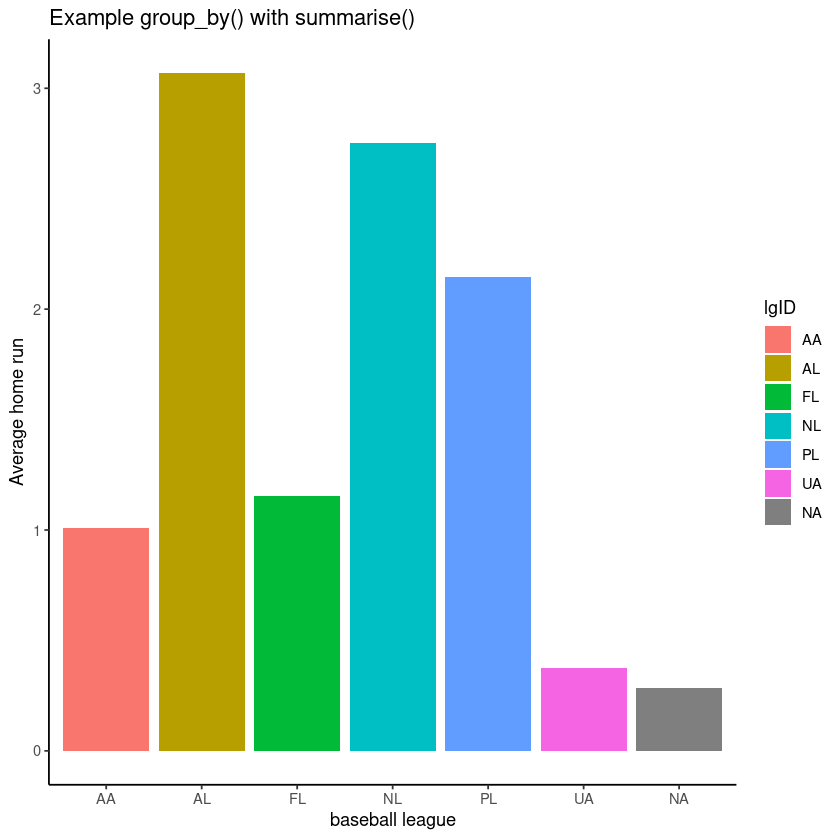

In [28]:
data %>%
    group_by(lgID) %>%
    summarise(mean_home_run = mean(HR)) %>%
    ggplot(aes(x = lgID, y = mean_home_run, fill = lgID)) + 
        geom_bar(stat = "identity") +
        theme_classic() +
        labs(
            x = "baseball league",
            y = "Average home run",
            title = paste(
                "Example group_by() with summarise()"
            )
        )

| Objective | Function     | Description                                                    |
|-----------|--------------|----------------------------------------------------------------|
| Basic     | mean()       | Average of vector x                                            |
|           | median()     | Median of vector x                                             |
|           | sum()        | Sum of vector x                                                |
| variation | sd()         | standard deviation of vector x                                 |
|           | IQR()        | Interquartile of vector x                                      |
| Range     | min()        | Minimum of vector x                                            |
|           | max()        | Maximum of vector x                                            |
|           | quantile()   | Quantile of vector x                                           |
| Position  | first()      | Use with group_by() First observation of the group             |
|           | last()       | Use with group_by(). Last observation of the group             |
|           | nth()        | Use with group_by(). nth observation of the group              |
| Count     | n()          | Use with group_by(). Count the number of rows                  |
|           | n_distinct() | Use with group_by(). Count the number of distinct observations |

In [33]:
## Mean
ex1 <- data %>%
    group_by(yearID) %>%
    summarise(mean_game_year = mean(G))
head(ex1)

`summarise()` ungrouping output (override with `.groups` argument)



yearID,mean_game_year
<int>,<dbl>
1871,19.96522
1872,21.05096
1873,28.83200
1874,34.13821
1875,28.66055
1876,37.87097


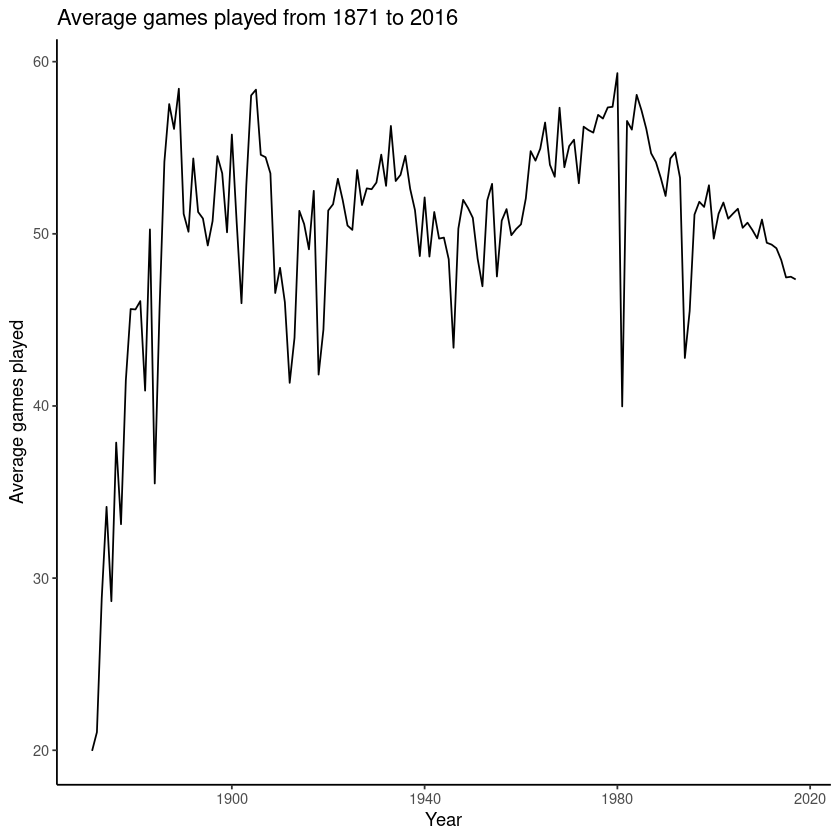

In [36]:
ggplot(ex1, aes(x = yearID, y = mean_game_year)) +
    geom_line() +
    theme_classic() +
    labs(
        x = "Year",
        y = "Average games played",
        title = paste(
            "Average games played from 1871 to 2016"
        )
    )

In [44]:
# distinct values
data %>%
    group_by(teamID) %>%
    summarise(number_player = n_distinct(playerID)) %>%
    arrange(desc(number_player)) %>%
    head()

`summarise()` ungrouping output (override with `.groups` argument)



teamID,number_player
<fct>,<int>
CHN,2051
PHI,2036
SLN,1971
CIN,1912
PIT,1877
CLE,1855


In [46]:
# Multiple groups
data %>%
    group_by(yearID, teamID) %>%
    summarise(mean_games = mean(G)) %>%
    arrange(desc(teamID, yearID))

`summarise()` regrouping output by 'yearID' (override with `.groups` argument)



yearID,teamID,mean_games
<int>,<fct>,<dbl>
1884,WSU,19.784314
1891,WS9,33.710526
1886,WS8,29.918919
1887,WS8,54.571429
1888,WS8,47.269231
1889,WS8,40.206897
1884,WS7,22.880000
1875,WS6,13.368421
1873,WS5,23.400000


In [25]:
library(tidyverse)
#library(hablar)
df <- read_csv("year, week, rat_house_females, rat_house_males, mouse_wild_females, mouse_wild_males 
               2018,10,1,1,1,1
               2018,10,1,1,1,1
               2018,11,2,2,2,2
               2018,11,2,2,2,2
               2019,10,3,3,3,3
               2019,10,3,3,3,3
               2019,11,4,4,4,4
               2019,11,4,4,4,4") %>% 
  convert(chr(year,week)) %>% 
  mutate(total_rodents = rowSums(select_if(., is.numeric))) %>% 
  convert(num(year,week)) %>% 
  group_by(year,week) %>% summarise(average = mean(total_rodents))

ERROR: Error in convert(., chr(year, week)): could not find function "convert"
